# Prophet model on Environment dataset

In [11]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [12]:
data= pd.read_csv("environmenr.csv")
print(df)

                  Country  Year CO2EmissionRate (mt)
0             Afghanistan  2021                 8.35
1                 Albania  2021                 4.59
2                 Algeria  2021                  173
3                  Angola  2021                24.45
4     Antigua and Barbuda  2021                 0.78
...                   ...   ...                  ...
5567            Venezuela  2018                  3.7
5568              Vietnam  2018                  2.8
5569                Yemen  2018                  0.4
5570               Zambia  2018                  0.3
5571             Zimbabwe  2018                  0.8

[5572 rows x 3 columns]


In [13]:
data = data[data['CO2EmissionRate (mt)'] != '-']
data['CO2EmissionRate (mt)'] = data['CO2EmissionRate (mt)'].replace(',', '', regex=True).astype(float)
print(data)

                  Country  Year  CO2EmissionRate (mt)
0             Afghanistan  2021                  8.35
1                 Albania  2021                  4.59
2                 Algeria  2021                173.00
3                  Angola  2021                 24.45
4     Antigua and Barbuda  2021                  0.78
...                   ...   ...                   ...
5567            Venezuela  2018                  3.70
5568              Vietnam  2018                  2.80
5569                Yemen  2018                  0.40
5570               Zambia  2018                  0.30
5571             Zimbabwe  2018                  0.80

[5450 rows x 3 columns]


In [14]:
data.rename(columns={'Year': 'ds', 'CO2EmissionRate (mt)': 'y'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'], format='%Y')

print(data.head())

holidays = pd.DataFrame({
  'holiday': 'major_event',
  'ds': pd.to_datetime(['2021-01-01', '2022-01-01']),
  'lower_window': 0,
  'upper_window': 1,
})

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays,
    seasonality_mode='multiplicative'
)

model.fit(data)

future = model.make_future_dataframe(periods=365, freq='D')  # Adjust 'freq' to 'Y' if data is yearly
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

               Country         ds       y
0          Afghanistan 2021-01-01    8.35
1              Albania 2021-01-01    4.59
2              Algeria 2021-01-01  173.00
3               Angola 2021-01-01   24.45
4  Antigua and Barbuda 2021-01-01    0.78


12:43:02 - cmdstanpy - INFO - Chain [1] start processing
12:43:03 - cmdstanpy - INFO - Chain [1] done processing


            ds        yhat  yhat_lower  yhat_upper
388 2021-12-28   88.141813 -158.098843  319.712152
389 2021-12-29   83.298727 -145.696909  306.981681
390 2021-12-30   69.260977 -161.039433  313.649078
391 2021-12-31  174.302398  -75.439738  417.845248
392 2022-01-01  110.524193 -127.720229  336.562100


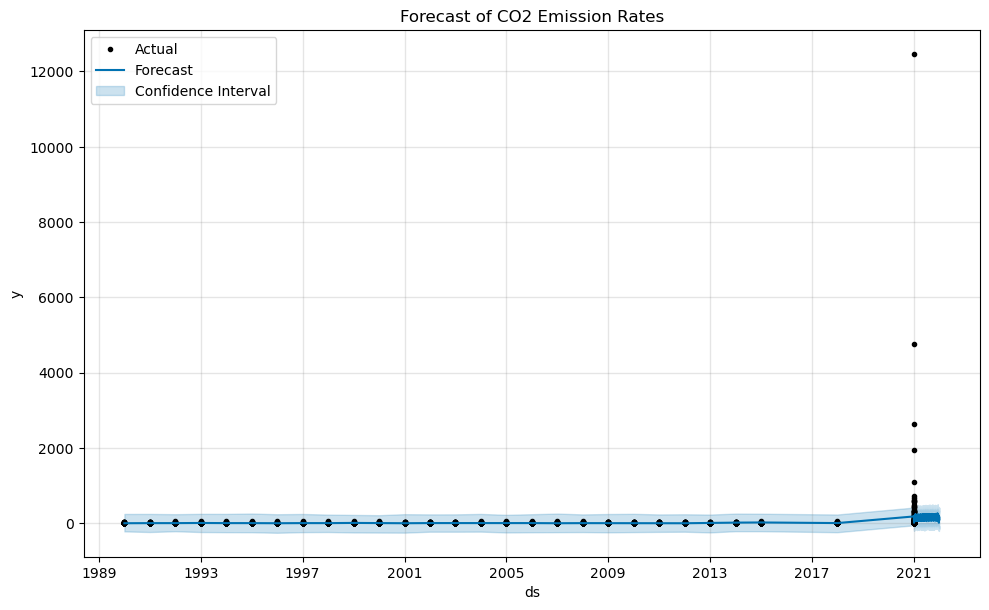

In [19]:
fig1 = model.plot(forecast)
plt.title('Forecast of CO2 Emission Rates')
plt.legend(['Actual', 'Forecast', 'Confidence Interval'], loc='upper left')
plt.show()

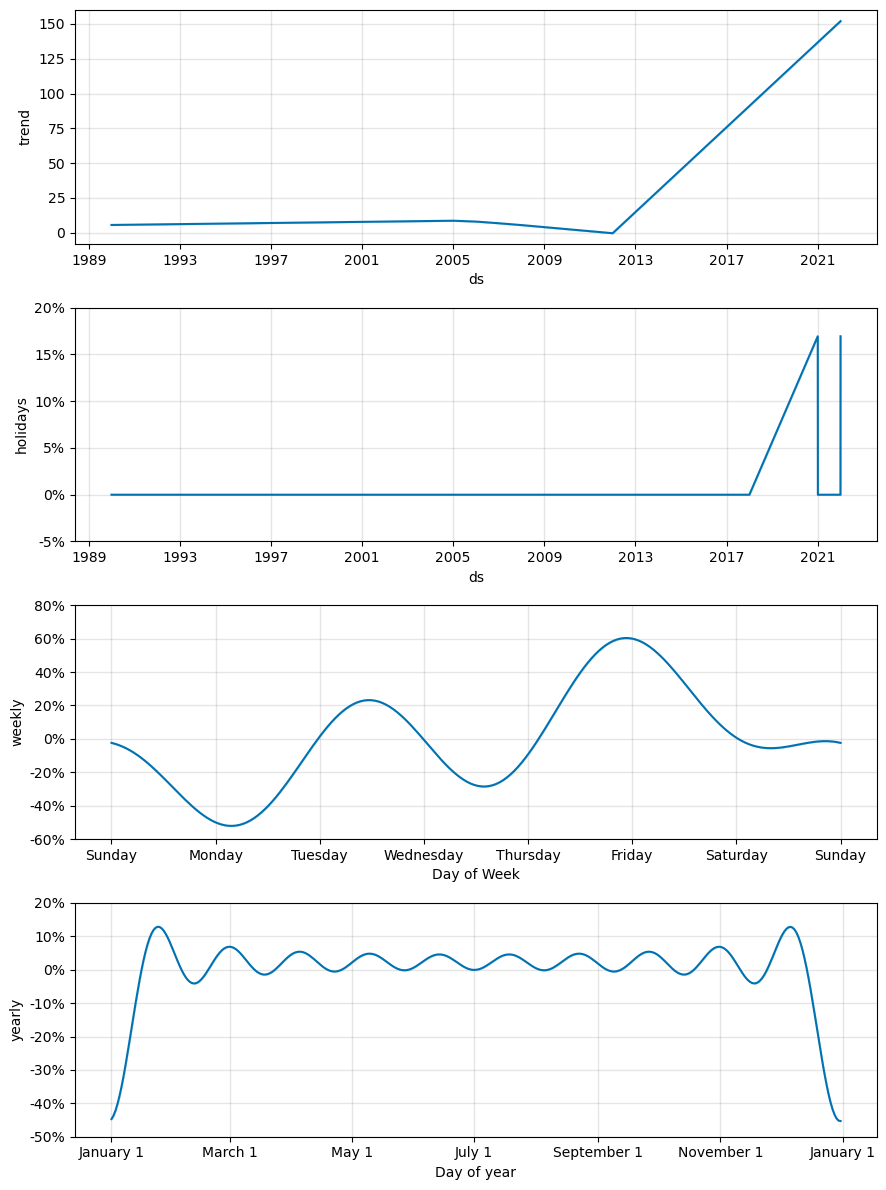

In [16]:
fig2 = model.plot_components(forecast)
plt.show()

In [20]:
import pickle
with open('prophet_environ.pkl', 'wb') as f:
    pickle.dump(model, f)